In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import data_cleaning as script

sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2) #change default plot size and font scale for a better look

<a id ='QuestionsToAnswer'></a>
## Questions To Answer

#### Analysis According to Price Brackets:
<ol>
    <li><a href="#Question1">according to my price bracket, what storage configuration should I use?</a></li>
    <li><a href="#Question2">for each price bracket, which companies use the strongest processors? (for programmers)</a></li>
    <li><a href="#Question3">for each price bracket, which companies use the strongest Video Cards? (for editors)</a></li>   
    <li><a href="#Question4">which gpu/cpu brands control each price bracket?</a></li>
</ol>

#### Most Popular Options:
<ol start="5">
    <li><a href="#Question5">most popular CPUs for each Ram configuration?</a></li>
    <li><a href="#Question6">most popular GPUs for each screen resolution?</a></li> 
</ol>

#### Other Trivia questions
<ol start="7">
    <li><a href="#Question7">are there any companies that overprice their products in comparison to the others?</a></li>
    <li><a href="#Question8">for a display to be considered 'retina', what's the threshold for each screen size?</a></li>
    <li><a href="#Question9">do touchscreens really affect overall laptop price?</a></li>
    <li><a href="#Question10">do'gaming' laptops really cost more than other laptop types? </a></li>
</ol>

In [83]:
df_raw = pd.read_csv("datasets/laptop_price.csv")

In [2]:
df_laptops = pd.read_csv("datasets/data.csv")
df_laptops.head()

,company_acer,company_apple,company_asus,company_dell,company_hp,company_lenovo,company_lg,company_msi,company_other (chinease/korean),company_other (european/american),...,screen_panel_ips,screen_resolution_l,screen_resolution_w,screen_retina_display,screen_touchscreen,typename_2 in 1 convertible,typename_gaming,typename_notebook,typename_ultrabook,weight_kg
0,0,1,0,0,0,0,0,0,0,0,...,1,1600,2560,1,0,0,0,0,1,1.37
1,0,1,0,0,0,0,0,0,0,0,...,0,900,1440,0,0,0,0,0,1,1.34
2,0,0,0,0,1,0,0,0,0,0,...,0,1080,1920,0,0,0,0,1,0,1.86
3,0,1,0,0,0,0,0,0,0,0,...,1,1800,2880,1,0,0,0,0,1,1.83
4,0,1,0,0,0,0,0,0,0,0,...,1,1600,2560,1,0,0,0,0,1,1.37


In [3]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   company_acer                       1289 non-null   int64  
 1   company_apple                      1289 non-null   int64  
 2   company_asus                       1289 non-null   int64  
 3   company_dell                       1289 non-null   int64  
 4   company_hp                         1289 non-null   int64  
 5   company_lenovo                     1289 non-null   int64  
 6   company_lg                         1289 non-null   int64  
 7   company_msi                        1289 non-null   int64  
 8   company_other (chinease/korean)    1289 non-null   int64  
 9   company_other (european/american)  1289 non-null   int64  
 10  company_samsung                    1289 non-null   int64  
 11  company_toshiba                    1289 non-null   int64

## Script reconstruct_data

Rebuilds One Hot Encoded columns back to full columns for analysis

Parameter: Dataframe after complete preprocessing

Returns: Dataframe without any One Hot Encoding

In [4]:
df_laptops = script.reconstruct_data(df_laptops)

In [5]:
df_laptops.head()

,companies,cpu_brand,cpu_cores,cpu_mark,cpu_name,cpu_name_key,cpu_thread_mark,gpu_brand,gpu_g2d_mark,gpu_g3d_mark,...,memory_secondary,opsystems,price_bracket,price_euros,ram_gb,screen_resolution_l,screen_resolution_w,screens,types,weight_kg
0,"Apple,",Intel,2,1749,Intel Core i5 2.3GHz,Intel Core i5-540M @ 2.53GHz,1132,Intel,563,1429,...,0.0,"Macos,",Mid Range,1339.69,8,1600,2560,"Panel ips,Retina display,","Ultrabook,",1.37
1,"Apple,",Intel,4,6369,Intel Core i5 1.8GHz,Intel Core i7-8565U @ 1.80GHz,2250,Intel,247,1037,...,0.0,"Macos,",Mid Range,898.94,8,900,1440,Other,"Ultrabook,",1.34
2,"Hp,",Intel,2,3413,Intel Core i5 7200U 2.5GHz,Intel Core i5-7200U @ 2.50GHz,1780,Intel,218,922,...,0.0,Other,Budget,575.00,8,1080,1920,Other,"Notebook,",1.86
3,"Apple,",Intel,2,1999,Intel Core i7 2.7GHz,Intel Core i7-620M @ 2.67GHz,1283,AMD,705,3113,...,0.0,"Macos,",High End,2537.45,16,1800,2880,"Panel ips,Retina display,","Ultrabook,",1.83
4,"Apple,",Intel,4,7947,Intel Core i5 3.1GHz,Intel Core i7-8705G @ 3.10GHz,2288,Intel,563,1429,...,0.0,"Macos,",High End,1803.60,8,1600,2560,"Panel ips,Retina display,","Ultrabook,",1.37


In [5]:
df_laptops.to_csv("datasets/df_EDA.csv",index = False)

In [2]:
df_laptops = pd.read_csv("datasets/df_EDA.csv")

In [3]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   companies            1289 non-null   object 
 1   cpu_brand            1289 non-null   object 
 2   cpu_cores            1289 non-null   int64  
 3   cpu_mark             1289 non-null   int64  
 4   cpu_name             1289 non-null   object 
 5   cpu_name_key         1289 non-null   object 
 6   cpu_thread_mark      1289 non-null   int64  
 7   gpu_brand            1289 non-null   object 
 8   gpu_g2d_mark         1289 non-null   int64  
 9   gpu_g3d_mark         1289 non-null   int64  
 10  gpu_name             1289 non-null   object 
 11  gpu_name_key         1289 non-null   object 
 12  inches               1289 non-null   float64
 13  memories             1289 non-null   object 
 14  memory_primary       1289 non-null   float64
 15  memory_secondary     1289 non-null   f

<a id="Question1"></a>
# according to my price bracket, what storage configuration should I use?

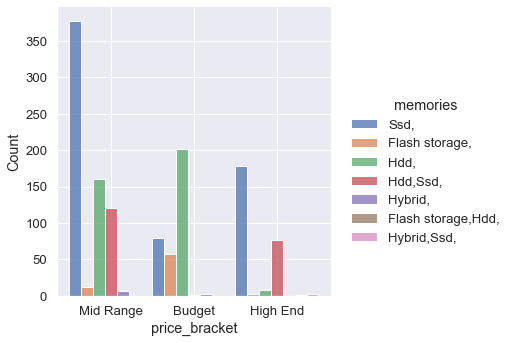

In [4]:
#memory type
sns.displot(x='price_bracket',data=df_laptops,hue='memories',multiple='dodge',stat = 'count')

<ul>
    <li>Budget Laptops use mostly HDDs, some use SSDs or flash Storage
    <li>Mid Range Laptops either use HDDs & SSDs, or just an SSD.
    <li>Similar to Mid Rangers, High End Laptops usually use SSDs exclusively, or use an HDDs & SSDs. However, a very small number of uses just an HDD</li>
    <li>(Hybrid), (Flash_stroage,HDD) and (Hybrid, SSDs) are not really common accross all Price Brackets.
    
</ul>

In [8]:
ptable_buget = pd.pivot_table(index = 'memory_primary',
               columns='memory_secondary',
               values = 'price_bracket',
               data = df_laptops[df_laptops['price_bracket'] == 'Budget'],
               aggfunc='count')

In [9]:
ptable_mid = pd.pivot_table(index = 'memory_primary',
               columns='memory_secondary',
               values = 'price_bracket',
               data = df_laptops[df_laptops['price_bracket'] == 'Mid Range'],
               aggfunc='count')

In [10]:
ptable_high = pd.pivot_table(index = 'memory_primary',
               columns='memory_secondary',
               values = 'price_bracket',
               data = df_laptops[df_laptops['price_bracket'] == 'High End'],
               aggfunc='count')

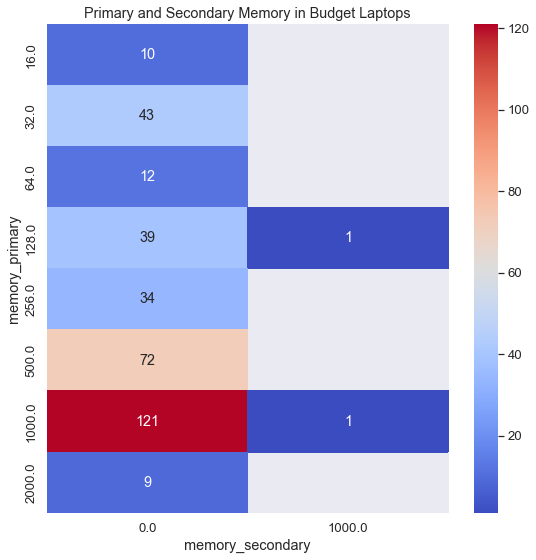

In [11]:
sns.heatmap(ptable_buget,cmap="coolwarm",annot = True,fmt='0.0f')
plt.title("Primary and Secondary Memory in Budget Laptops")
plt.show();

<font color = 'blue'>almost all Budget laptops have only primary Storage</font>

<font color = 'blue'> 

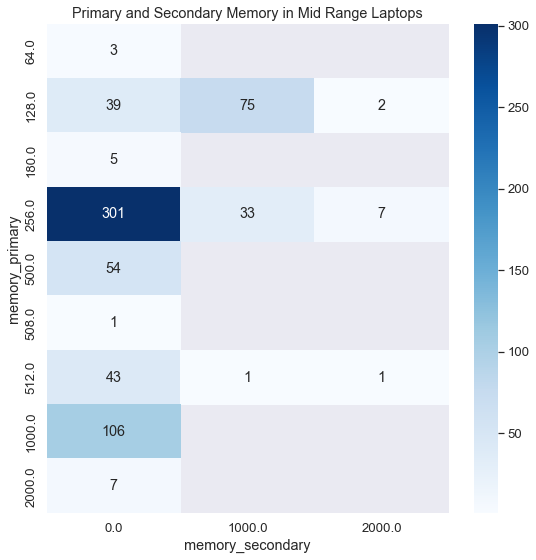

In [12]:
sns.heatmap(ptable_mid,cmap="Blues",annot = True,fmt='0.0f')
plt.title("Primary and Secondary Memory in Mid Range Laptops")
plt.show();

<font color = 'blue'>there is a wide range of combos of primary and secondary memory. However, most popular options are a 1TB Main Storage. or a 256 SSD with a 1TB HDD</font>

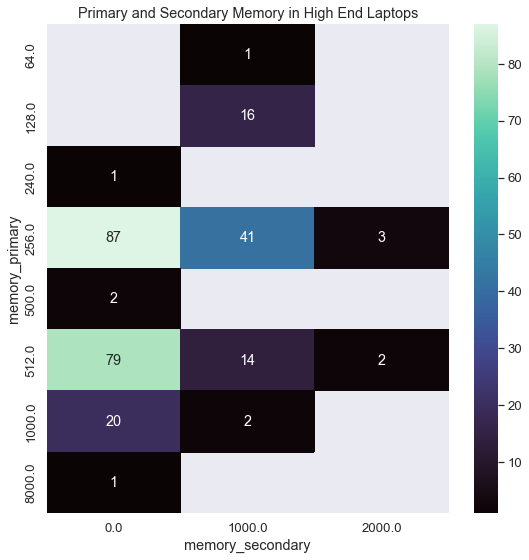

In [14]:
sns.heatmap(ptable_high,cmap="mako",annot = True,fmt='0.0f')
plt.title("Primary and Secondary Memory in High End Laptops")
plt.show();

<font color = 'blue'>there is a wide range of combos of primary and secondary memory. However, most popular options are a 256 GB Single Storage. or a 256 SSD with a 1TB Secondary Storage</font>

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>Budget Laptops use mostly HDDs, some use SSDs or flash Storage.</li>
    <li>Mid Range Laptops either use HDDs & SSDs, or just an SSD.</li>
    <li>Similar to Mid Rangers, High End Laptops usually use SSDs exclusively, or use an HDDs & SSDs. However, a very small number of uses just an HDD</li>
    <li>(Hybrid), (Flash_stroage,HDD) and (Hybrid, SSDs) are not really common accross all Price Brackets.</li>
</ul>

A lot more Mid Range Laptops now use SSDs Exclusively as they grew in popularity and got cheaper.
As SSDs get Cheaper, Hybrid Options get less appealing as the difference in price gets smaller.

### As for Storage Capacity, it's recommended you run
<ul>
    <li>Budget Laptops: use just primary storage to save up on cost
    <li>Mid Range Laptops: 1TB Main Storage. or a 128 SSD with a 1TB HDD
    <li>High End Laptops: 256 GB Single Storage. or a 256 SSD with a 1TB Secondary Storage</li>    
</ul>

<a id="Question2"></a>
# for each price bracket, which companies use the strongest processors? (for programmers)

In [15]:
df_laptops.keys()

Index(['companies', 'cpu_brand', 'cpu_cores', 'cpu_mark', 'cpu_name',
       'cpu_name_key', 'cpu_thread_mark', 'gpu_brand', 'gpu_g2d_mark',
       'gpu_g3d_mark', 'gpu_name', 'gpu_name_key', 'inches', 'memories',
       'memory_primary', 'memory_secondary', 'opsystems', 'price_bracket',
       'price_euros', 'ram_gb', 'screen_resolution_l', 'screen_resolution_w',
       'screens', 'types', 'weight_kg'],
      dtype='object')

In [16]:
df_laptops['price_bracket'].unique()

array(['Mid Range', 'Budget', 'High End'], dtype=object)

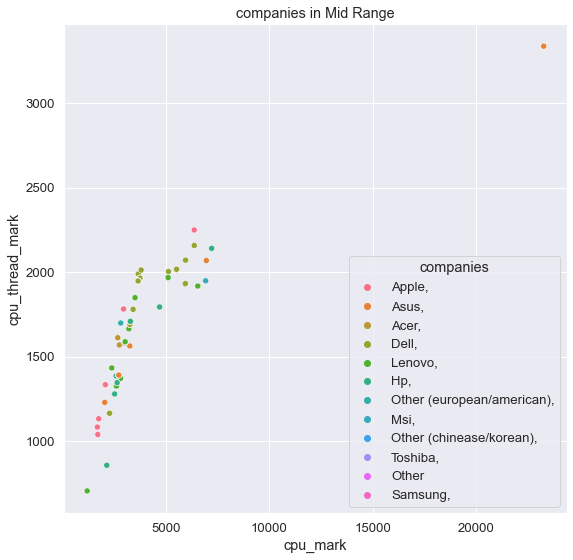

                            count         mean          std     min      25%  \
companies                                                                      
Acer,                        39.0  4724.589744  1513.457017  2608.0  3413.00   
Apple,                       14.0  2789.785714  1593.599032  1684.0  1749.00   
Asus,                        77.0  5325.233766  3392.528063  2041.0  3413.00   
Dell,                       182.0  4662.587912  1406.713705  2138.0  3413.00   
Hp,                         153.0  4101.771242  1353.942992  2138.0  3280.00   
Lenovo,                     135.0  4330.348148  1478.015730  1190.0  3346.50   
Msi,                         28.0  6366.000000   913.509837  3654.0  6182.50   
Other                         3.0  3285.000000   221.702503  3029.0  3221.00   
Other (chinease/korean),      6.0  4233.166667  1341.014156  3029.0  3413.00   
Other (european/american),    6.0  3053.833333   357.844333  2589.0  2814.00   
Samsung,                      2.0  3533.

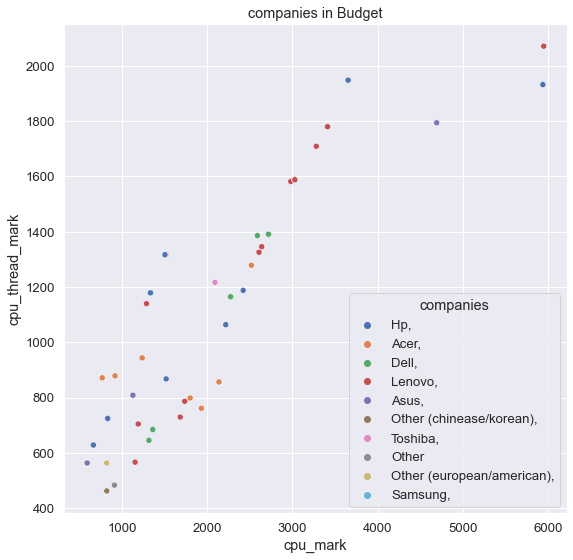

                            count         mean          std     min     25%  \
companies                                                                     
Acer,                        61.0  1904.049180  1037.498746   591.0   918.0   
Asus,                        45.0  1813.666667   979.415016   591.0  1128.0   
Dell,                        51.0  2346.098039   869.573902   591.0  2274.0   
Hp,                          68.0  2095.205882  1178.798915   664.0  1334.0   
Lenovo,                      97.0  2279.175258   960.327104   591.0  1334.0   
Other                         4.0  1019.500000   125.285008   911.0   911.0   
Other (chinease/korean),      3.0  1221.000000   616.522506   821.0   866.0   
Other (european/american),    7.0  1220.428571   494.292038   820.0   911.0   
Samsung,                      1.0   664.000000          NaN   664.0   664.0   
Toshiba,                      5.0  2550.600000   371.805460  2091.0  2274.0   

                               50%      75%     max

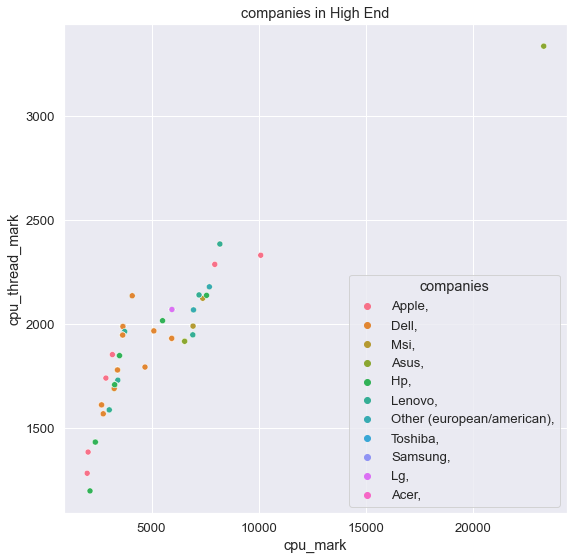

                            count         mean          std     min      25%  \
companies                                                                      
Acer,                         3.0  6817.000000   239.023011  6541.0  6748.00   
Apple,                        7.0  5152.857143  3384.336638  1999.0  2457.00   
Asus,                        32.0  7310.468750  4371.004786  3654.0  6541.00   
Dell,                        64.0  5794.125000  1666.696205  2670.0  3665.00   
Hp,                          46.0  4491.804348  1761.813644  2131.0  3280.00   
Lenovo,                      63.0  4536.761905  1568.363825  3029.0  3506.00   
Lg,                           3.0  4419.333333  1325.596218  3654.0  3654.00   
Msi,                         26.0  6901.115385   259.846313  6541.0  6922.00   
Other (european/american),   10.0  5444.200000  1962.578565  2670.0  3773.50   
Samsung,                      5.0  4314.200000  1476.252079  3654.0  3654.00   
Toshiba,                     10.0  3510.

In [17]:
for price in ['Mid Range', 'Budget', 'High End']:
    sns.scatterplot(x='cpu_mark',y='cpu_thread_mark',
                    hue='companies',data = df_laptops[df_laptops['price_bracket'] == price])
    plt.title(f'companies in {price}')
    plt.show();
    print(df_laptops[df_laptops['price_bracket'] == price].groupby('companies')['cpu_mark'].describe())

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>For Budget Laptops, Dell and Lenovo have higher overall scores beating the competition by around 10% more performance with a smaller standard Deviations. Meaning most of their models are pretty well placed when it comes to price to performance.  </li>
    <li>For Mid Range Laptops, Msi Rules this class with an overall 15% more performance over other companies. not to mention having one of the smallest Deviation scores. </li>
    <li>As for the High End market, Asus and Msi are above the competition with an honorable mention to Acer. </li>
</ul>


<a id="Question3"></a>
# for each price bracket, which companies use the strongest Video Cards? (for editors)

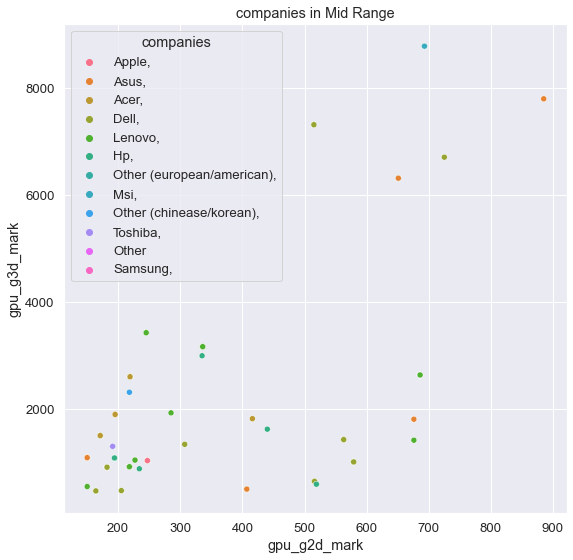

G2D Marks: 
                             count        mean         std    min     25%  \
companies                                                                  
Acer,                        39.0  319.589744  187.733394  171.0  218.00   
Apple,                       14.0  283.857143  118.988595  218.0  225.25   
Asus,                        77.0  390.324675  229.383581  150.0  218.00   
Dell,                       182.0  337.428571  183.452443  164.0  218.00   
Hp,                         153.0  264.928105  133.934347  164.0  218.00   
Lenovo,                     135.0  318.274074  184.901685  150.0  218.00   
Msi,                         28.0  609.892857  132.493281  245.0  651.00   
Other                         3.0  218.000000    0.000000  218.0  218.00   
Other (chinease/korean),      6.0  210.166667   19.187670  171.0  218.00   
Other (european/american),    6.0  218.000000    0.000000  218.0  218.00   
Samsung,                      2.0  218.000000    0.000000  218.0  218.00   

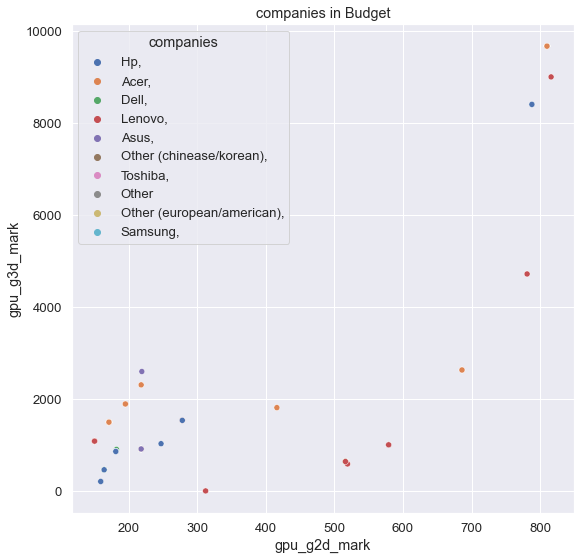

G2D Marks: 
                             count        mean         std    min    25%  \
companies                                                                 
Acer,                        61.0  302.721311  209.523040  171.0  218.0   
Asus,                        45.0  204.466667   26.004021  150.0  218.0   
Dell,                        51.0  275.549020  128.466543  164.0  218.0   
Hp,                          68.0  256.485294  156.769009  159.0  218.0   
Lenovo,                      97.0  258.865979  142.131148  150.0  218.0   
Other                         4.0  218.000000    0.000000  218.0  218.0   
Other (chinease/korean),      3.0  218.000000    0.000000  218.0  218.0   
Other (european/american),    7.0  218.000000    0.000000  218.0  218.0   
Samsung,                      1.0  218.000000         NaN  218.0  218.0   
Toshiba,                      5.0  218.000000    0.000000  218.0  218.0   

                              50%    75%    max  
companies                           

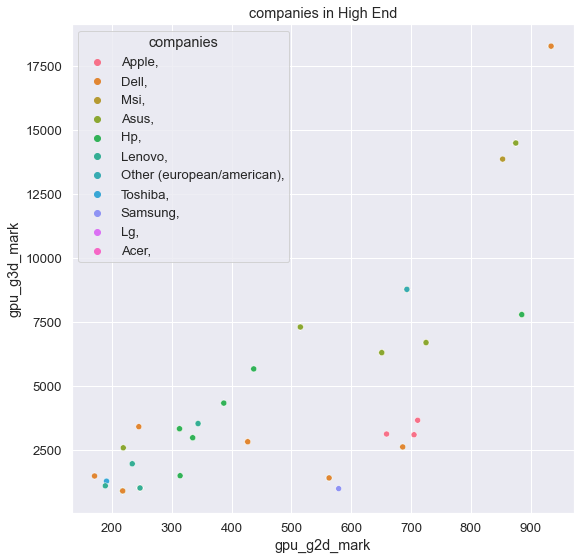

G2D Marks: 
                             count        mean         std    min    25%  \
companies                                                                 
Acer,                         3.0  753.666667  105.077749  693.0  693.0   
Apple,                        7.0  573.000000  158.345614  247.0  563.0   
Asus,                        32.0  664.187500  234.543818  218.0  515.0   
Dell,                        64.0  489.687500  264.102907  171.0  218.0   
Hp,                          46.0  299.456522  164.827817  218.0  218.0   
Lenovo,                      63.0  293.333333  147.913008  171.0  218.0   
Lg,                           3.0  218.000000    0.000000  218.0  218.0   
Msi,                         26.0  759.153846  111.264619  515.0  693.0   
Other (european/american),   10.0  607.200000  245.966484  218.0  563.0   
Samsung,                      5.0  367.400000  228.263663  171.0  218.0   
Toshiba,                     10.0  212.600000   11.384200  191.0  218.0   

           

In [18]:
for price in ['Mid Range', 'Budget', 'High End']:
    sns.scatterplot(x='gpu_g2d_mark',y='gpu_g3d_mark',
                    hue='companies',data = df_laptops[df_laptops['price_bracket'] == price])
    plt.title(f'companies in {price}')
    plt.show();
    
    print("G2D Marks: \n",df_laptops[df_laptops['price_bracket'] == price].groupby('companies')['gpu_g2d_mark'].describe(), "\n")
    print("G3D Marks: \n",df_laptops[df_laptops['price_bracket'] == price].groupby('companies')['gpu_g3d_mark'].describe(), "\n")

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>For Budget Laptops, Acer Dell and Hp have the highest G2D/G3D Marks.</li>
    <li>For Mid Range Laptops, Msi beats out all of the competition with over 30% scores.</li>
    <li>For High End, Acer, Asus and Msi are above the competition by a respectable Margin.</li>
</ul>

<a id="Question4"></a>
# which gpu/cpu brands controls each price bracket?

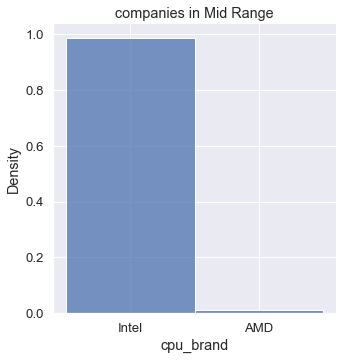

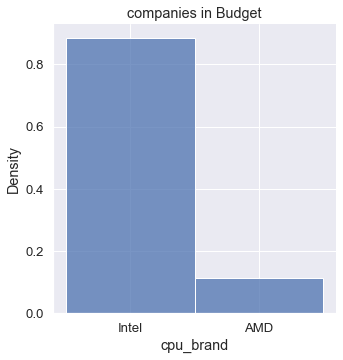

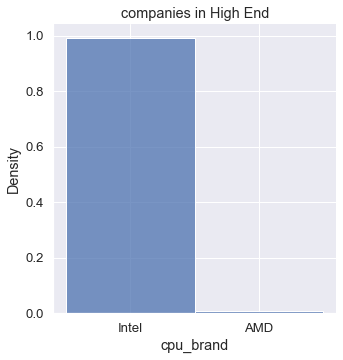

In [19]:
for price in ['Mid Range', 'Budget', 'High End']:
    sns.displot(x='cpu_brand',data = df_laptops[df_laptops['price_bracket'] == price],stat = 'density',common_norm = False)
    plt.title(f'companies in {price}')
    plt.show();
    
#     print("G2D Marks: \n",df_laptops[df_laptops['price_bracket'] == price].groupby('companies')['gpu_g2d_mark'].describe(), "\n")
#     print("G3D Marks: \n",df_laptops[df_laptops['price_bracket'] == price].groupby('companies')['gpu_g3d_mark'].describe(), "\n")

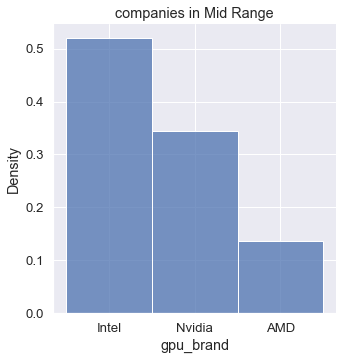

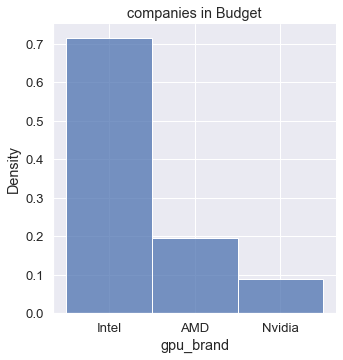

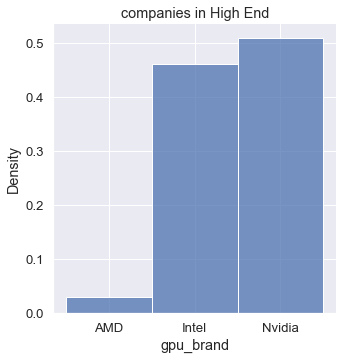

In [20]:
for price in ['Mid Range', 'Budget', 'High End']:
    sns.displot(x='gpu_brand',data = df_laptops[df_laptops['price_bracket'] == price],stat = 'density',common_norm = False)
    plt.title(f'companies in {price}')
    plt.show();

<font color = 'green'><h2>Observations:</h2></font>
### CPU brands
<ul>
    <li>For all price Brackets, Intel dominates the CPU space. (note: this dataset is a year old)</li>
</ul>

### GPU brands
<ul>
    <li>For Budget and Mid Range Laptops,Intel is the most popular option for most.</li>
    <li>Nividia has a Respectable margin of the market, coming at a close second after Intel.</li>
    <li>For High End Laptops, Nividia is the most popular followed closely by Intel.</li>
</ul>

For most Laptops, the user only needs Intel integrated graphics. However, as the price increases, Nividia offers a more compelling offer than Intel to the users that need the extra GPU power.
AMD is not as prevalent in the Laptop space as it is in Desktop.

<a id="Question5"></a>
# most popular CPUs for each Ram configuration?

In [5]:
import sqlite3
connection = sqlite3.connect('data_db.db')

In [6]:
sql = """
SELECT ram_gb, cpu_name_key, COUNT(*)
FROM laptops
GROUP BY ram_gb, cpu_name
ORDER BY ram_gb, COUNT(*) DESC
"""

cursor = connection.execute(sql)

result = cursor.fetchall()

df_res = pd.DataFrame(result,columns=['ram_gb', 'cpu_name_key', 'COUNT(*)'])
df_res.head()

,ram_gb,cpu_name_key,COUNT(*)
0,2,Intel Celeron N3060 @ 1.60GHz,7
1,2,Intel Celeron N3050 @ 1.60GHz,6
2,2,Intel Celeron N3350 @ 1.10GHz,3
3,2,Intel Celeron 3205U @ 1.50GHz,2
4,2,Intel Atom x5-Z8350 @ 1.44GHz,2


In [7]:
df_res.groupby('ram_gb').first()

,cpu_name_key,COUNT(*)
ram_gb,,
2,Intel Celeron N3060 @ 1.60GHz,7
4,Intel Core i5-7200U @ 2.50GHz,60
6,Intel Core i5-7200U @ 2.50GHz,9
8,Intel Core i5-7200U @ 2.50GHz,119
12,Intel Core i7-7700HQ @ 2.80GHz,7
16,Intel Core i7-7700HQ @ 2.80GHz,72
24,Intel Core i7-7700HQ @ 2.80GHz,1
32,Intel Core i7-7700HQ @ 2.80GHz,6
64,Intel Core i7-6820HK @ 2.70GHz,1


In [29]:
# connection.close()

<font color = 'green'><h2>Observations:</h2></font>

<ul>
    <li>For Laptops with 2 GBs of RAM, Intel Celeron N3060 @ 1.60GHz is the most popular.</li>
    <li>For Laptops with 4~8 GBs or RAM, Intel Core i5-7200U @ 2.50GHz is the most popular.</li>
    <li>For Laptops with 12~32 GBs or RAM, Intel Core i7-7700HQ @ 2.80GHz is the most popular.</li>
    <li>For Laptops with 64 GBs or RAM, Intel Core i7-6820HK @ 2.70GHz is the most popular.</li>  
</ul>

<a id="Question6"></a>
# most popular GPUs for each screen resolution?

In [24]:
sql = """
SELECT  gpu_name, gpu_g2d_mark, screen_resolution_w, screen_resolution_l, COUNT(*)
FROM laptops
GROUP BY gpu_name, screen_resolution_w, screen_resolution_l
ORDER BY gpu_name, screen_resolution_w, screen_resolution_l, COUNT(*) DESC
"""

cursor = connection.execute(sql)

result = cursor.fetchall()

df_res = pd.DataFrame(result,columns=['gpu_name','gpu_g2d_mark', 'screen_resolution_w', 'screen_resolution_l' , 'COUNT(*)'])
df_res.sample(5)

,gpu_name,gpu_g2d_mark,screen_resolution_w,screen_resolution_l,COUNT(*)
119,Nvidia GeForce 930MX,191,1366,768,1
73,Intel HD Graphics 520,218,2560,1440,12
115,Nvidia GeForce 920MX,150,1600,900,2
27,AMD Radeon R5 M330,519,1600,900,1
168,Nvidia GeForce MX150,218,1920,1080,14


In [25]:
results = df_res.groupby(['screen_resolution_w','screen_resolution_l']).first()
results

gpu_name  \
screen_resolution_w screen_resolution_l                            
1366                768                           AMD Radeon 520   
1440                900                   Intel HD Graphics 6000   
1600                900                            AMD Radeon R3   
1920                1080                      AMD FirePro W4190M   
                    1200                   Intel HD Graphics 400   
2160                1440                   Intel HD Graphics 620   
2256                1504                   Intel HD Graphics 615   
2304                1440                   Intel HD Graphics 515   
2400                1600                   Intel HD Graphics 615   
2560                1440                   Intel HD Graphics 515   
                    1600                 Intel Iris Graphics 540   
2736                1824                   Intel HD Graphics 500   
2880                1800                      AMD Radeon Pro 455   
3200                1800                   Intel HD Graphics 515   
3840                2160                   Intel HD Graphics 515   

                                         gpu_g2d_mark  COUNT(*)  
screen_resolution_w screen_resolution_l                          
1366                768                           164         3  
1440                900                           247         4  
1600                900                           816         1  
1920                1080                          194         3  
                    1200                          218         5  
2160                1440                          218         2  
2256                1504                          218         1  
2304                1440                          218         2  
2400                1600                          218         3  
2560                1440                          218         1  
                    1600                          247         1  
2736                1824                          218         1  
2880                1800                          705         1  
3200                1800                          218         3  
3840                2160                          218         2

In [26]:
results['gpu_name'].value_counts()

Intel HD Graphics 515      4
Intel HD Graphics 615      2
AMD Radeon Pro 455         1
Intel Iris Graphics 540    1
Intel HD Graphics 620      1
AMD Radeon 520             1
AMD FirePro W4190M         1
AMD Radeon R3              1
Intel HD Graphics 400      1
Intel HD Graphics 6000     1
Intel HD Graphics 500      1
Name: gpu_name, dtype: int64

<AxesSubplot:xlabel='screen_resolution_l', ylabel='screen_resolution_w'>

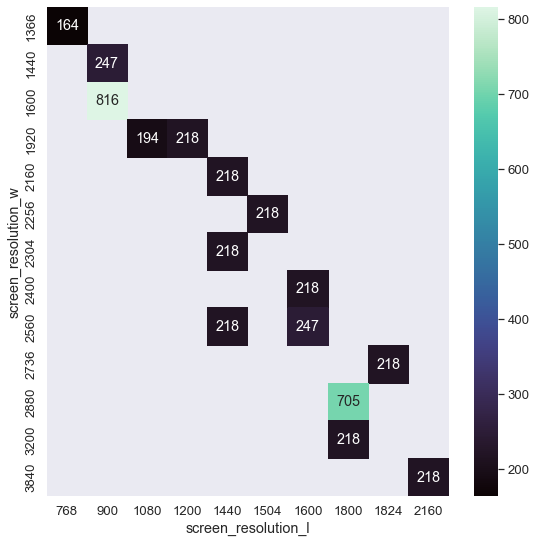

In [27]:
table = pd.pivot_table(index='screen_resolution_w',columns='screen_resolution_l',values='gpu_g2d_mark',data = results)
sns.heatmap(table,cmap="mako",annot = True,fmt='0.0f')

In [28]:
results[results['gpu_g2d_mark'].isin([705,816])]

,,gpu_name,gpu_g2d_mark,COUNT(*)
screen_resolution_w,screen_resolution_l,,,
1600,900,AMD Radeon R3,816,1
2880,1800,AMD Radeon Pro 455,705,1


In [29]:
sql = """
SELECT  gpu_name, gpu_g3d_mark, screen_resolution_w, screen_resolution_l, COUNT(*)
FROM laptops
GROUP BY gpu_name, screen_resolution_w, screen_resolution_l
ORDER BY gpu_name, screen_resolution_w, screen_resolution_l, COUNT(*) DESC
"""

cursor = connection.execute(sql)

result = cursor.fetchall()

df_res = pd.DataFrame(result,columns=['gpu_name','gpu_g3d_mark', 'screen_resolution_w', 'screen_resolution_l' , 'COUNT(*)'])
df_res.sample(5)

,gpu_name,gpu_g3d_mark,screen_resolution_w,screen_resolution_l,COUNT(*)
85,Intel HD Graphics 615,922,2400,1600,3
47,AMD Radeon RX 540,1820,1366,768,2
99,Intel Iris Plus Graphics 640,1429,1920,1080,1
14,AMD Radeon R3,9001,1600,900,1
65,Intel HD Graphics 515,922,1920,1080,7


In [30]:
results2 = df_res.groupby(['screen_resolution_w','screen_resolution_l']).first()
results2

gpu_name  \
screen_resolution_w screen_resolution_l                            
1366                768                           AMD Radeon 520   
1440                900                   Intel HD Graphics 6000   
1600                900                            AMD Radeon R3   
1920                1080                      AMD FirePro W4190M   
                    1200                   Intel HD Graphics 400   
2160                1440                   Intel HD Graphics 620   
2256                1504                   Intel HD Graphics 615   
2304                1440                   Intel HD Graphics 515   
2400                1600                   Intel HD Graphics 615   
2560                1440                   Intel HD Graphics 515   
                    1600                 Intel Iris Graphics 540   
2736                1824                   Intel HD Graphics 500   
2880                1800                      AMD Radeon Pro 455   
3200                1800                   Intel HD Graphics 515   
3840                2160                   Intel HD Graphics 515   

                                         gpu_g3d_mark  COUNT(*)  
screen_resolution_w screen_resolution_l                          
1366                768                           470         3  
1440                900                          1037         4  
1600                900                          9001         1  
1920                1080                         1086         3  
                    1200                          922         5  
2160                1440                          922         2  
2256                1504                          922         1  
2304                1440                          922         2  
2400                1600                          922         3  
2560                1440                          922         1  
                    1600                         1037         1  
2736                1824                          922         1  
2880                1800                         3113         1  
3200                1800                          922         3  
3840                2160                          922         2

In [31]:
results.gpu_g2d_mark.describe()

count     15.00000
mean     289.00000
std      193.52593
min      164.00000
25%      218.00000
50%      218.00000
75%      232.50000
max      816.00000
Name: gpu_g2d_mark, dtype: float64

In [32]:
results2.gpu_g3d_mark.describe()

count      15.000000
mean     1602.800000
std      2127.641927
min       470.000000
25%       922.000000
50%       922.000000
75%      1037.000000
max      9001.000000
Name: gpu_g3d_mark, dtype: float64

<font color = 'green'><h2>Observations:</h2></font>

<ul>
    <li>the Median of G2D is way lower than the median of G3D.</li>
    <li>For G2D marks, accross all screen resolutions, the standard deviation seems to be lower than in with G2D marks (~280 to 2.1k).</li>
</ul>

<a id="Question7"></a>
# are there any companies that overprice their products in comparison to the others?

In [8]:
table = df_laptops.groupby(['price_bracket','companies']).describe()['price_euros']
table

count         mean          std  \
price_bracket companies                                                     
Budget        Acer,                        61.0   417.277213   111.868823   
              Asus,                        45.0   407.159778   112.625620   
              Dell,                        51.0   484.000588    89.464429   
              Hp,                          68.0   454.670588   118.539791   
              Lenovo,                      97.0   455.143093   115.025674   
              Other                         4.0   217.425000    29.020266   
              Other (chinease/korean),      3.0   314.296667   116.672889   
              Other (european/american),    7.0   295.000000    60.663004   
              Samsung,                      1.0   269.000000          NaN   
              Toshiba,                      5.0   507.000000    57.214509   
High End      Acer,                         3.0  2277.666667   332.513659   
              Apple,                        7.0  2253.984286   371.592912   
              Asus,                        32.0  2176.868750   585.022759   
              Dell,                        64.0  2251.519062   537.018113   
              Hp,                          46.0  2114.803478   540.150742   
              Lenovo,                      63.0  2181.950794   543.705193   
              Lg,                           3.0  2099.000000   200.000000   
              Msi,                         26.0  2212.080769   289.768302   
              Other (european/american),   10.0  3084.885000  1533.834628   
              Samsung,                      5.0  1739.000000    82.158384   
              Toshiba,                     10.0  1944.000000   339.789150   
Mid Range     Acer,                        39.0   827.461538   162.127272   
              Apple,                       14.0  1219.305714   192.950377   
              Asus,                        77.0  1104.880260   263.435537   
              Dell,                       182.0  1008.138681   256.660017   
              Hp,                         153.0  1051.974248   275.421523   
              Lenovo,                     135.0  1039.973333   260.134657   
              Msi,                         28.0  1280.247857   202.025179   
              Other                         3.0   729.000000    75.498344   
              Other (chinease/korean),      6.0  1230.308333   226.422809   
              Other (european/american),    6.0  1213.500000   218.675787   
              Samsung,                      2.0  1549.000000    70.710678   
              Toshiba,                     33.0  1178.181818   249.752059   

                                              min        25%      50%  \
price_bracket companies                                                 
Budget        Acer,                        174.00   349.0000   395.00   
              Asus,                        191.90   309.0000   398.99   
              Dell,                        274.90   441.4500   481.98   
              Hp,                          209.00   381.0000   481.50   
              Lenovo,                      229.00   359.9900   469.00   
              Other                        196.00   201.1750   206.85   
              Other (chinease/korean),     244.99   246.9450   248.90   
              Other (european/american),   239.00   252.0000   265.00   
              Samsung,                     269.00   269.0000   269.00   
              Toshiba,                     447.00   489.0000   498.00   
High End      Acer,                       1935.00  2117.0000  2299.00   
              Apple,                      1803.60  1999.4500  2139.97   
              Asus,                       1649.00  1799.0000  1949.50   
              Dell,                       1624.00  1818.2500  2036.71   
              Hp,                         1629.00  1799.0000  1972.00   
              Lenovo,                     1637.00  1799.0000  2025.00   
              Lg,               

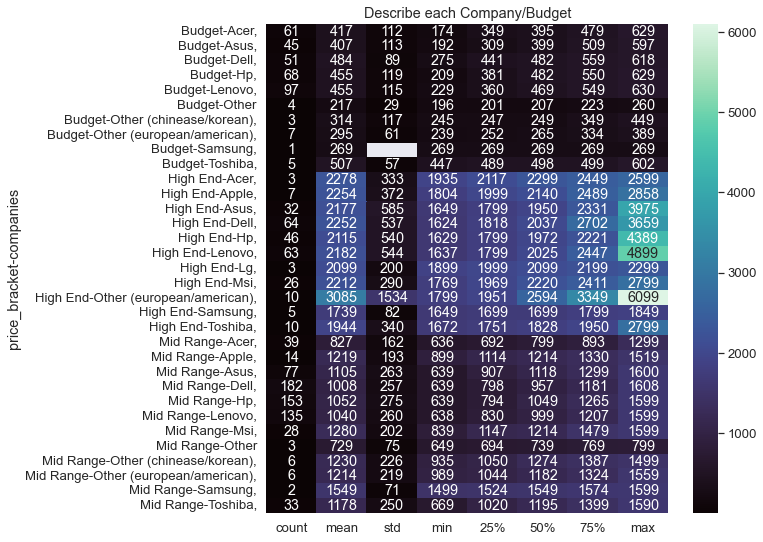

In [9]:
sns.heatmap(table,cmap="mako",annot = True,fmt='0.0f')
plt.title("Describe each Company/Budget");

<font color = 'green'><h2>Observations:</h2></font>

<ul>
    <li>For the Budget Options, Toshiba is the most expensive.</li>
    <li>For the Mid Range Options, Msi is slightly more expensive than its competition.</li>
    <li>For the High End Market, European/American Companies are more expensive.</li>
</ul>

<a id="Question8"></a>
# for a display to be considered 'retina', what's the threshold for each screen size?

In [12]:
df_laptops['screens'].unique()

array(['Panel ips,Retina display,', 'Other', 'Panel ips,',
       'Panel ips,Touchscreen,', 'Touchscreen,'], dtype=object)

In [18]:
df_Retina = df_laptops[df_laptops['screens'] == 'Panel ips,Retina display,'][['inches','screen_resolution_l','screen_resolution_w']]
df_Retina

,inches,screen_resolution_l,screen_resolution_w
0,13.3,1600,2560
3,15.4,1800,2880
4,13.3,1600,2560
6,15.4,1800,2880
12,15.4,1800,2880
14,12.0,1440,2304
15,13.3,1600,2560
17,15.4,1800,2880
44,13.3,1600,2560
80,12.0,1440,2304


In [29]:
df_not_Retina = df_laptops[df_laptops['screens'] != 'Panel ips,Retina display,'][['inches','screen_resolution_l','screen_resolution_w']]
df_not_Retina

,inches,screen_resolution_l,screen_resolution_w
1,13.3,900,1440
2,15.6,1080,1920
5,15.6,768,1366
7,13.3,900,1440
8,14.0,1080,1920
...,...,...,...
1284,14.0,1080,1920
1285,13.3,1800,3200
1286,14.0,768,1366
1287,15.6,768,1366


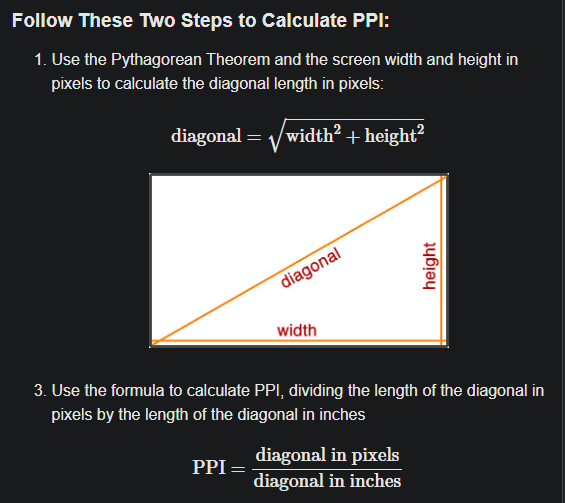

In [27]:
df_Retina['PPI'] = (np.sqrt(pow(df_Retina['screen_resolution_w'],2) + pow(df_Retina['screen_resolution_l'],2))) / df_Retina['inches']

In [37]:
df_Retina

,inches,screen_resolution_l,screen_resolution_w,PPI
0,13.3,1600,2560,226.983005
3,15.4,1800,2880,220.534624
4,13.3,1600,2560,226.983005
6,15.4,1800,2880,220.534624
12,15.4,1800,2880,220.534624
14,12.0,1440,2304,226.415547
15,13.3,1600,2560,226.983005
17,15.4,1800,2880,220.534624
44,13.3,1600,2560,226.983005
80,12.0,1440,2304,226.415547


In [30]:
df_not_Retina['PPI'] = (np.sqrt(pow(df_not_Retina['screen_resolution_w'],2) + pow(df_not_Retina['screen_resolution_l'],2))) / df_not_Retina['inches']

In [38]:
df_not_Retina['PPI']

1       127.677940
2       141.211998
5       100.454670
7       127.677940
8       157.350512
           ...    
1284    157.350512
1285    276.053530
1286    111.935204
1287    100.454670
1288    100.454670
Name: PPI, Length: 1272, dtype: float64

In [36]:
df_laptops.keys()

Index(['companies', 'cpu_brand', 'cpu_cores', 'cpu_mark', 'cpu_name',
       'cpu_name_key', 'cpu_thread_mark', 'gpu_brand', 'gpu_g2d_mark',
       'gpu_g3d_mark', 'gpu_name', 'gpu_name_key', 'inches', 'memories',
       'memory_primary', 'memory_secondary', 'opsystems', 'price_bracket',
       'price_euros', 'ram_gb', 'screen_resolution_l', 'screen_resolution_w',
       'screens', 'types', 'weight_kg'],
      dtype='object')

In [39]:
df_laptops.screens.unique()

array(['Panel ips,Retina display,', 'Other', 'Panel ips,',
       'Panel ips,Touchscreen,', 'Touchscreen,'], dtype=object)

<font color = 'green'><h2>Observations:</h2></font>

<ul>
    <li>Average PPI for Normal Displays have at least 75 less PPIs than 'Retina' Displays.</li>
    <li>For our Dataset, you need to atleast have 220.5 Pixels per Inch to qualify as a 'Retina' Display.</li>
    <li>Some laptops that qualify as a Retina Display are not advertised as Retina, which might suggest that there is more to the story.</li>
</ul>

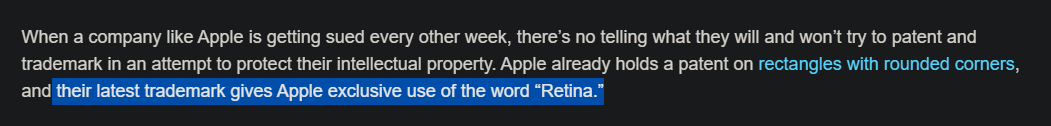
<a href='https://www.cultofmac.com/204248/apple-now-owns-the-trademark-for-the-word-retina/'>src</a>

In [34]:
df_laptops[df_laptops['screens'] == 'Panel ips,Retina display,']['companies'].value_counts()

Apple,                      16
Other (chinease/korean),     1
Name: companies, dtype: int64

<font color = 'green'> only apple has the right to market its products as 'Retina'.</font>

<a id="Question9"></a>
# do touchscreens really affect overall laptop price?

In [51]:
df_laptops['touch'] = df_laptops['screens'] == 'Touchscreen,'

df_laptops['touch'].value_counts()

df_laptops.groupby('touch')['price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
touch,,,,,,,,
False,1182.0,1093.994162,666.115863,174.0,597.000,949.0,1408.5,4899.0
True,107.0,1541.452056,898.231109,275.0,849.005,1549.0,1873.0,6099.0


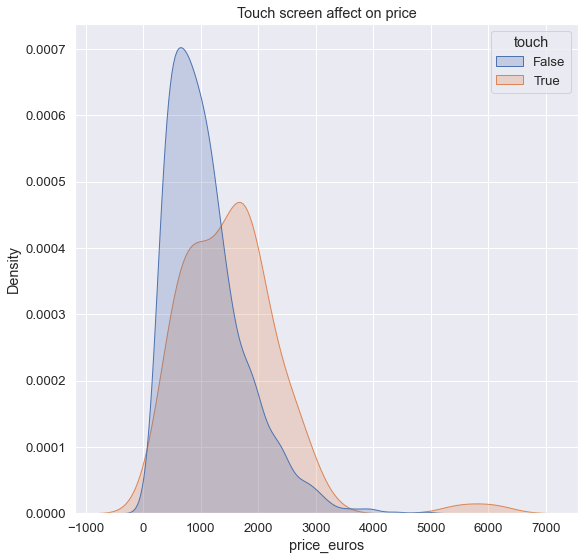

In [49]:
sns.kdeplot(x='price_euros',hue='touch',data = df_laptops,common_norm = False,shade = True)
plt.title("Touch screen affect on price");

<font color = 'green'><h2>Observations:</h2></font>

<ul>
    <li>Average screen prices are higher for touchscreens than for normal ones. </li>
</ul>

<a id="Question10"></a>
# do 'gaming' laptops really cost more than other laptop types?

In [53]:
df_laptops.types.unique()

array(['Ultrabook,', 'Notebook,', 'Gaming,', '2 in 1 convertible,',
       'Other'], dtype=object)

In [54]:
df_laptops['gaming'] = df_laptops['types'] == 'Gaming,'

df_laptops['gaming'].value_counts()

df_laptops.groupby('gaming')['price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
gaming,,,,,,,,
False,1084.0,1017.623100,612.379617,174.0,552.2475,869.005,1349.0,4899.0
True,205.0,1731.380634,814.174430,699.0,1169.0000,1492.800,2199.0,6099.0


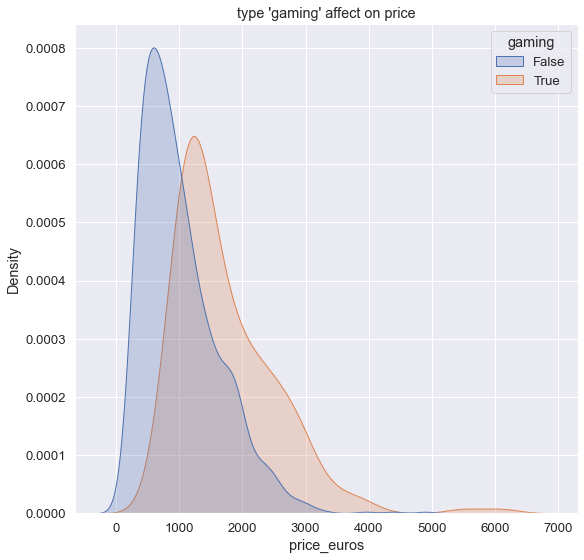

In [55]:
sns.kdeplot(x='price_euros',hue='gaming',data = df_laptops,common_norm = False,shade = True)
plt.title("type 'gaming' affect on price");

<font color = 'green'><h2>Observations:</h2></font>
<ul>
    <li>Gaming Laptops are generally more expensive (almost double the deviation). </li>
</ul>

# Extra: Tableau Story
<a href="https://public.tableau.com/app/profile/yehia.hesham/viz/Dashboard_Laptop_Prices/Story1">Link</a>

# Model Selection

In [61]:
df_laptops.keys()

Index(['company_acer', 'company_apple', 'company_asus', 'company_dell',
       'company_hp', 'company_lenovo', 'company_lg', 'company_msi',
       'company_other (chinease/korean)', 'company_other (european/american)',
       'company_samsung', 'company_toshiba', 'cpu_brand', 'cpu_cores',
       'cpu_mark', 'cpu_name', 'cpu_name_key', 'cpu_thread_mark', 'gpu_brand',
       'gpu_g2d_mark', 'gpu_g3d_mark', 'gpu_name', 'gpu_name_key', 'inches',
       'memory_flash_storage', 'memory_hdd', 'memory_hybrid', 'memory_primary',
       'memory_secondary', 'memory_ssd', 'opsys_android', 'opsys_chrome os',
       'opsys_linux', 'opsys_macos', 'opsys_windows 10', 'opsys_windows 7',
       'price_bracket', 'price_euros', 'ram_gb', 'screen_panel_ips',
       'screen_resolution_l', 'screen_resolution_w', 'screen_retina_display',
       'screen_touchscreen', 'typename_2 in 1 convertible', 'typename_gaming',
       'typename_notebook', 'typename_ultrabook', 'weight_kg'],
      dtype='object')

In [7]:
unwanted = ['cpu_name', 'cpu_name_key','gpu_name', 'gpu_name_key']

In [8]:
onhot = ['cpu_brand','gpu_brand', 'price_bracket']

In [2]:
# df_laptops = pd.read_csv("datasets/data.csv")

In [135]:
df_laptops = df_laptops.drop(unwanted,axis =1)

In [136]:
df_laptops.keys()

Index(['company_acer', 'company_apple', 'company_asus', 'company_dell',
       'company_hp', 'company_lenovo', 'company_lg', 'company_msi',
       'company_other (chinease/korean)', 'company_other (european/american)',
       'company_samsung', 'company_toshiba', 'cpu_brand', 'cpu_cores',
       'cpu_mark', 'cpu_thread_mark', 'gpu_brand', 'gpu_g2d_mark',
       'gpu_g3d_mark', 'inches', 'memory_flash_storage', 'memory_hdd',
       'memory_hybrid', 'memory_primary', 'memory_secondary', 'memory_ssd',
       'opsys_android', 'opsys_chrome os', 'opsys_linux', 'opsys_macos',
       'opsys_windows 10', 'opsys_windows 7', 'price_bracket', 'price_euros',
       'ram_gb', 'screen_panel_ips', 'screen_resolution_l',
       'screen_resolution_w', 'screen_retina_display', 'screen_touchscreen',
       'typename_2 in 1 convertible', 'typename_gaming', 'typename_notebook',
       'typename_ultrabook', 'weight_kg'],
      dtype='object')

In [137]:
df_laptops = pd.get_dummies(data = df_laptops, columns= onhot,drop_first=True)

In [138]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   company_acer                       1289 non-null   int64  
 1   company_apple                      1289 non-null   int64  
 2   company_asus                       1289 non-null   int64  
 3   company_dell                       1289 non-null   int64  
 4   company_hp                         1289 non-null   int64  
 5   company_lenovo                     1289 non-null   int64  
 6   company_lg                         1289 non-null   int64  
 7   company_msi                        1289 non-null   int64  
 8   company_other (chinease/korean)    1289 non-null   int64  
 9   company_other (european/american)  1289 non-null   int64  
 10  company_samsung                    1289 non-null   int64  
 11  company_toshiba                    1289 non-null   int64

In [139]:
from sklearn.model_selection import train_test_split

x = df_laptops.drop('price_euros', axis=1)
y= df_laptops['price_euros']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [140]:
x_train

,company_acer,company_apple,company_asus,company_dell,company_hp,company_lenovo,company_lg,company_msi,company_other (chinease/korean),company_other (european/american),...,typename_2 in 1 convertible,typename_gaming,typename_notebook,typename_ultrabook,weight_kg,cpu_brand_Intel,gpu_brand_Intel,gpu_brand_Nvidia,price_bracket_High End,price_bracket_Mid Range
370,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1.910,0,0,0,0,0
1061,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,2.310,1,1,0,0,1
629,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1.420,1,1,0,0,0
555,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1.160,1,1,0,1,0
223,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2.200,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1.500,1,0,0,0,1
959,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,2.400,1,0,1,0,1
1091,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1.500,1,1,0,0,1
452,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1.252,1,1,0,0,1


In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [142]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.288027,-0.121268,-0.374828,-0.546248,1.926706,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,-0.202334,-4.941766,-1.133000,-0.664674,-0.504525,-1.055360
1,-0.288027,-0.121268,-0.374828,-0.546248,1.926706,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,0.401276,0.202357,0.882613,-0.664674,-0.504525,0.947544
2,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,1.841442,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,-0.941756,0.202357,0.882613,-0.664674,-0.504525,-1.055360
3,-0.288027,-0.121268,-0.374828,-0.546248,1.926706,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,-1.164516,2.408904,-1.334103,0.202357,0.882613,-0.664674,1.982062,-1.055360
4,3.471895,-0.121268,-0.374828,-0.546248,-0.519021,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,0.235283,0.202357,-1.133000,1.504498,-0.504525,0.947544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,1.841442,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,-0.821034,0.202357,-1.133000,-0.664674,-0.504525,0.947544
962,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,1.841442,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,0.537088,0.202357,-1.133000,1.504498,-0.504525,0.947544
963,-0.288027,-0.121268,-0.374828,1.830670,-0.519021,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,-1.164516,2.408904,-0.821034,0.202357,0.882613,-0.664674,-0.504525,0.947544
964,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,-0.543053,-0.045549,-0.210533,-0.085436,7.471515,...,-0.326388,-0.435494,-1.164516,2.408904,-1.195272,0.202357,0.882613,-0.664674,-0.504525,0.947544


In [143]:
# from sklearn.decomposition import PCA

# pca = PCA(0.95)
# pca.fit(x_train)
# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

In [144]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.288027,-0.121268,-0.374828,-0.546248,1.926706,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,-0.202334,-4.941766,-1.133000,-0.664674,-0.504525,-1.055360
1,-0.288027,-0.121268,-0.374828,-0.546248,1.926706,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,0.401276,0.202357,0.882613,-0.664674,-0.504525,0.947544
2,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,1.841442,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,-0.941756,0.202357,0.882613,-0.664674,-0.504525,-1.055360
3,-0.288027,-0.121268,-0.374828,-0.546248,1.926706,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,-1.164516,2.408904,-1.334103,0.202357,0.882613,-0.664674,1.982062,-1.055360
4,3.471895,-0.121268,-0.374828,-0.546248,-0.519021,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,0.235283,0.202357,-1.133000,1.504498,-0.504525,0.947544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,1.841442,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,-0.821034,0.202357,-1.133000,-0.664674,-0.504525,0.947544
962,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,1.841442,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,0.858726,-0.415127,0.537088,0.202357,-1.133000,1.504498,-0.504525,0.947544
963,-0.288027,-0.121268,-0.374828,1.830670,-0.519021,-0.543053,-0.045549,-0.210533,-0.085436,-0.133842,...,-0.326388,-0.435494,-1.164516,2.408904,-0.821034,0.202357,0.882613,-0.664674,-0.504525,0.947544
964,-0.288027,-0.121268,-0.374828,-0.546248,-0.519021,-0.543053,-0.045549,-0.210533,-0.085436,7.471515,...,-0.326388,-0.435494,-1.164516,2.408904,-1.195272,0.202357,0.882613,-0.664674,-0.504525,0.947544


In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(), 
    'RF': RandomForestRegressor(n_estimators=120),
    'XGB': XGBRegressor()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    print(f'Model: {name}')
    print(f'Train accuracy: {r2_score(y_train, y_pred_train)}')
    print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')
    print('-'*50)

Model: LR
Train accuracy: 0.8944108697127425
Testing Accuracy: 0.8448158511248319
--------------------------------------------------
Model: DT
Train accuracy: 0.9994922801325851
Testing Accuracy: 0.8364246496102513
--------------------------------------------------
Model: KNN
Train accuracy: 0.9015218173719853
Testing Accuracy: 0.7758015486656489
--------------------------------------------------
Model: SVM
Train accuracy: 0.033564976144501935
Testing Accuracy: 0.01437346020136332
--------------------------------------------------
Model: RF
Train accuracy: 0.98785018929962
Testing Accuracy: 0.8779417849204538
--------------------------------------------------
Model: XGB
Train accuracy: 0.9970900834193012
Testing Accuracy: 0.8643179935403146
--------------------------------------------------


# Model Selected: XGBoost Regressor